In [1]:
# Importing the library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # visualization library based on matplotlib
from IPython.display import display # Manage multiple output per cell

# Manage UTF-8 issue
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

In [2]:
# DB Sqlite connection
import sqlite3
db = "./data/db/soccer_predict.sqlite"
conn = sqlite3.connect(db)
cur = conn.cursor()

In [3]:
# Get all prematch
df = pd.read_sql_query("SELECT * FROM pre_matchs ORDER BY INFO_Date ASC;", conn)

In [4]:
# dataset size
df.shape

(7309, 103)

In [5]:
# dataset preview
df.head()

,index,A_FIVE_AC,A_FIVE_AF,A_FIVE_AR,A_FIVE_AS,A_FIVE_AST,A_FIVE_AY,A_FIVE_FTAG,A_FIVE_FTHG,A_FIVE_FTR_A,...,INFO_Date,INFO_Div,INFO_FTAG,INFO_FTHG,INFO_FTR,INFO_HTR,INFO_HomeTeam,INFO_PSA,INFO_PSD,INFO_PSH
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,None,None,NaN,NaN,None,None,None,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,None,None,NaN,NaN,None,None,None,NaN,NaN,NaN
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,None,None,NaN,NaN,None,None,None,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,None,None,NaN,NaN,None,None,None,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,None,None,NaN,NaN,None,None,None,NaN,NaN,NaN


In [6]:
# Remove all game between June (include) and October (include)
df['INFO_Date'] = pd.to_datetime(df['INFO_Date'])
df['INFO_Date'].dt.month
df = df[(df['INFO_Date'].dt.month < 6) | (df['INFO_Date'].dt.month > 10)]
df.head()

,index,A_FIVE_AC,A_FIVE_AF,A_FIVE_AR,A_FIVE_AS,A_FIVE_AST,A_FIVE_AY,A_FIVE_FTAG,A_FIVE_FTHG,A_FIVE_FTR_A,...,INFO_Date,INFO_Div,INFO_FTAG,INFO_FTHG,INFO_FTR,INFO_HTR,INFO_HomeTeam,INFO_PSA,INFO_PSD,INFO_PSH
505,0,3.8,16.2,0.2,9.6,3.2,2.6,0.6,2.2,0.0,...,2013-11-01,F1,0.0,4.0,H,H,Paris SG,19.97,7.20,1.20
506,0,4.6,14.8,0.4,11.2,5.6,2.2,2.2,1.6,0.4,...,2013-11-01,D1,1.0,6.0,H,H,Dortmund,13.10,6.75,1.26
507,0,5.4,18.4,0.2,11.6,4.0,3.2,1.0,1.8,0.2,...,2013-11-01,SP1,0.0,1.0,H,D,Barcelona,28.60,11.70,1.11
508,0,6.4,15.2,0.2,10.2,2.6,1.6,0.4,2.2,0.0,...,2013-11-02,F1,3.0,1.0,A,D,Ajaccio,3.03,3.13,2.66
509,0,3.0,17.2,0.0,8.6,3.8,2.8,1.0,1.2,0.4,...,2013-11-02,F1,1.0,2.0,H,D,Evian Thonon Gaillard,2.89,3.23,2.70


In [7]:
df.shape

(5322, 103)

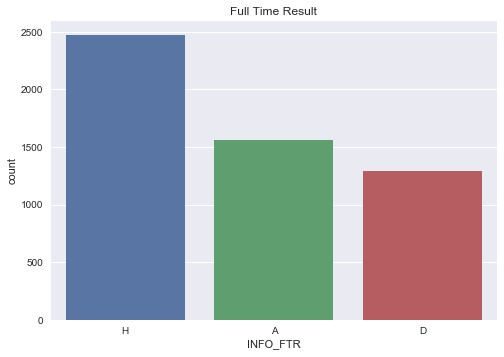

None

H    46.429914
A    29.274709
D    24.295378
Name: INFO_FTR, dtype: float64

In [8]:
# Get statistic about Final Home victory, Draw and Away victory
ax = plt.axes()
sns.countplot(x='INFO_FTR', data=df, ax=ax);
ax.set_title('Full Time Result')
display(plt.show(), 100. * df.INFO_FTR.value_counts() / len(df.INFO_FTR))

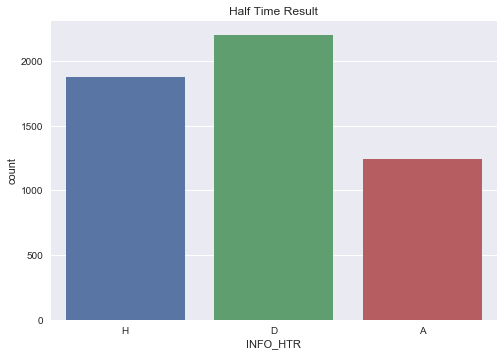

None

D    41.375423
H    35.212326
A    23.393461
Name: INFO_HTR, dtype: float64

In [9]:
# Get statistic about Half Time Home victory, Draw and Away victory
ax = plt.axes()
sns.countplot(x='INFO_HTR', data=df, ax=ax);
ax.set_title('Half Time Result')
display(plt.show(), 100. * df.INFO_HTR.value_counts() / len(df.INFO_HTR))

In [10]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Feature Type"]
dtype_df

,Count,Feature Type
0,index,int64
1,A_FIVE_AC,float64
2,A_FIVE_AF,float64
3,A_FIVE_AR,float64
4,A_FIVE_AS,float64
5,A_FIVE_AST,float64
6,A_FIVE_AY,float64
7,A_FIVE_FTAG,float64
8,A_FIVE_FTHG,float64
9,A_FIVE_FTR_A,float64


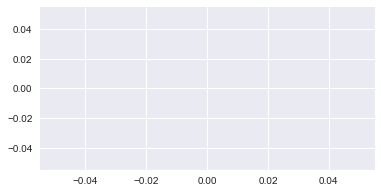

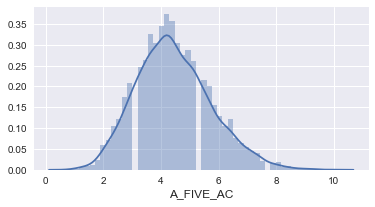

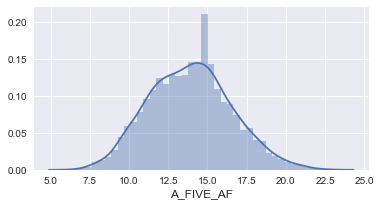

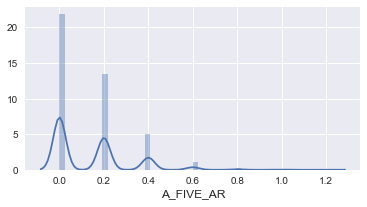

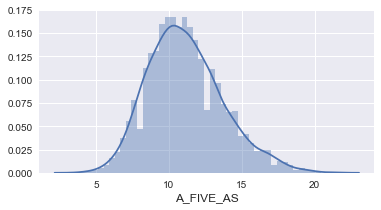

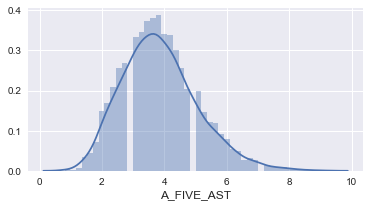

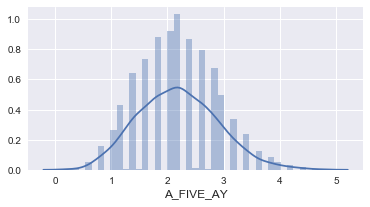

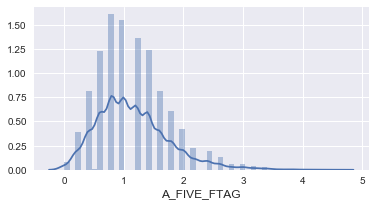

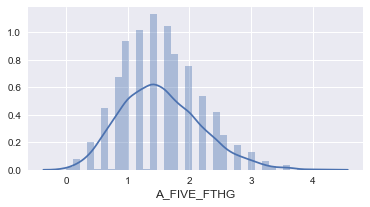

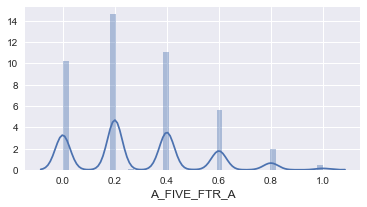

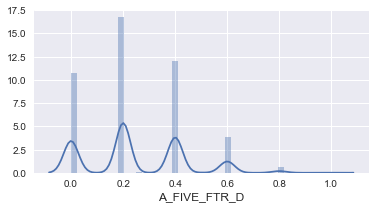

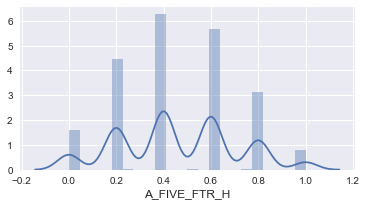

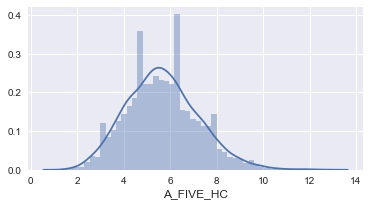

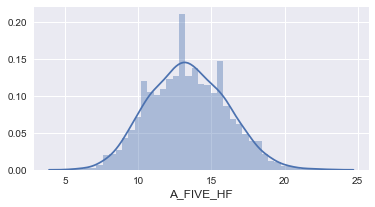

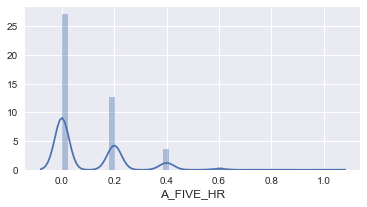

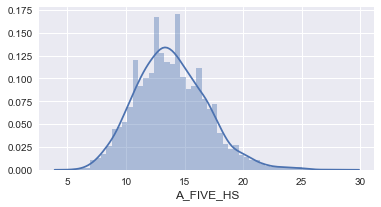

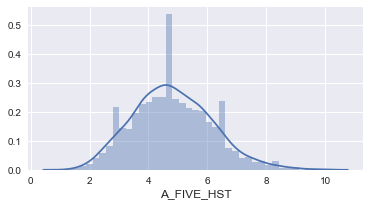

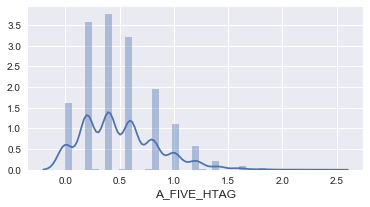

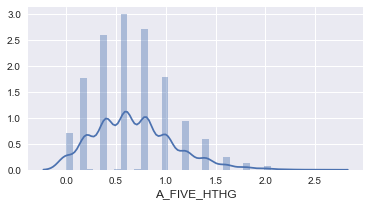

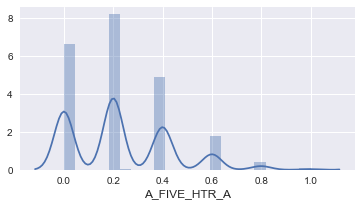

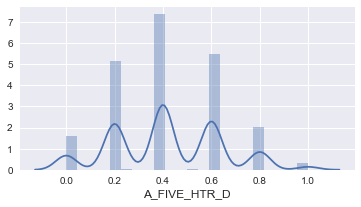

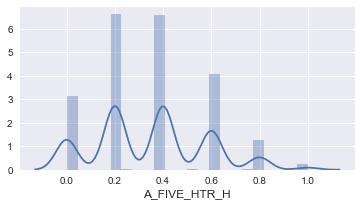

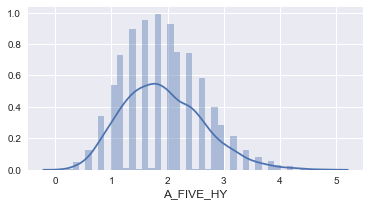

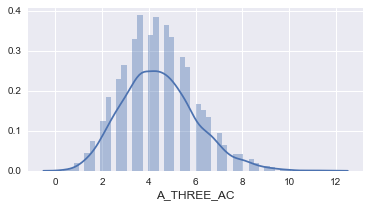

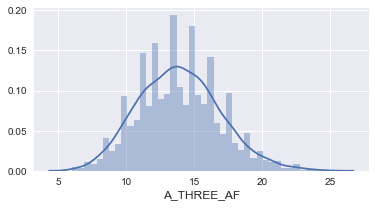

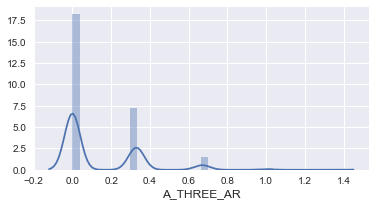

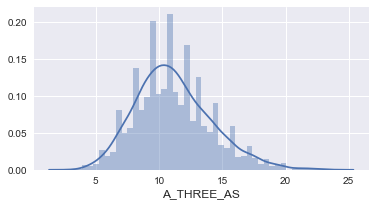

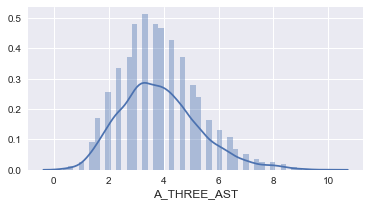

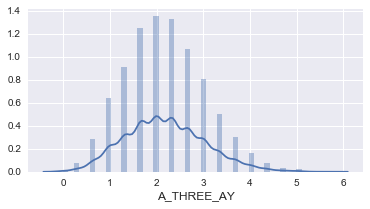

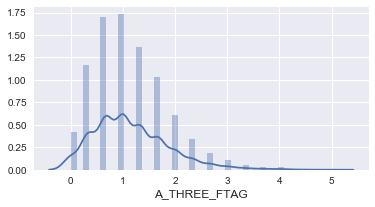

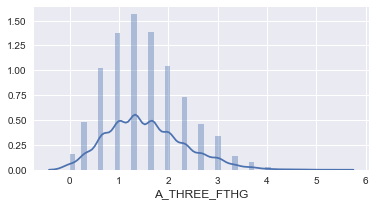

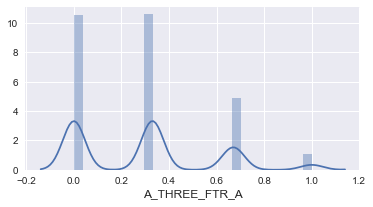

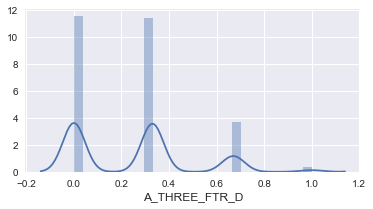

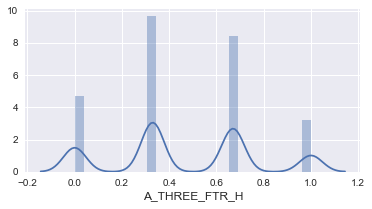

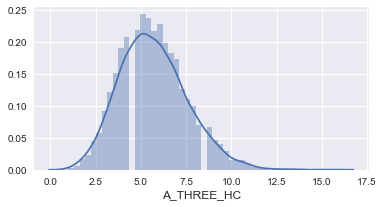

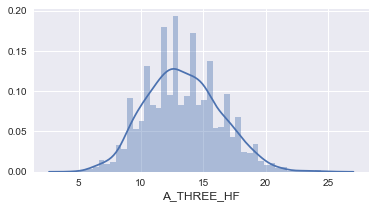

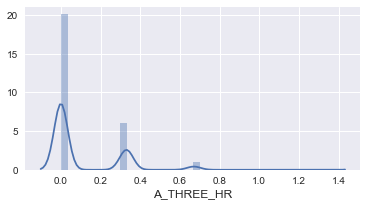

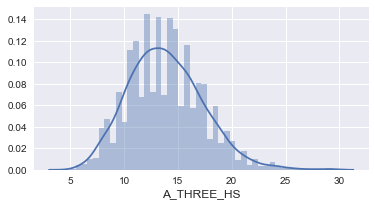

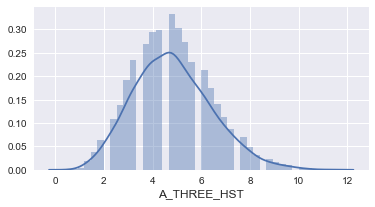

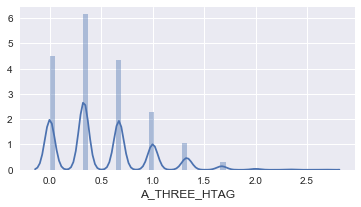

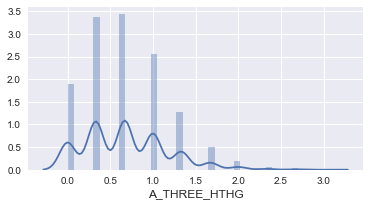

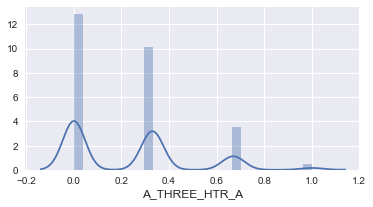

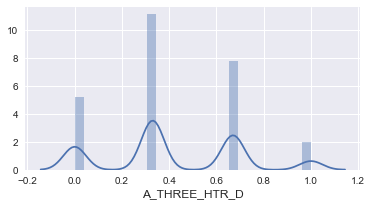

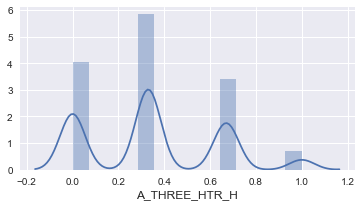

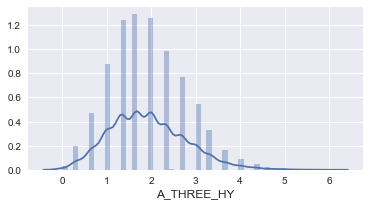

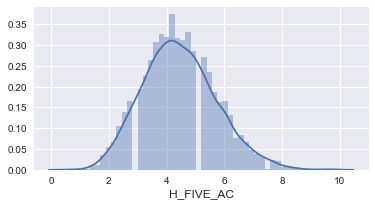

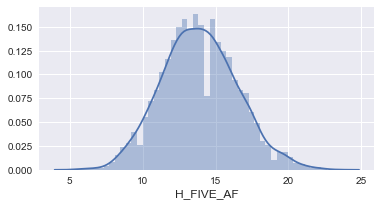

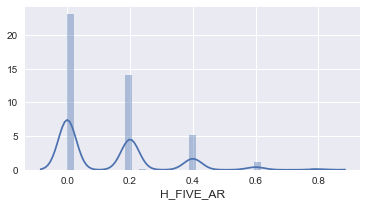

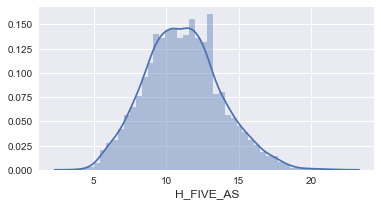

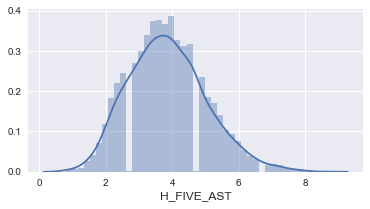

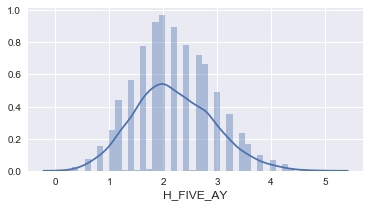

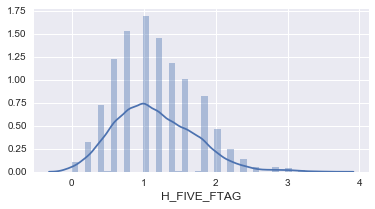

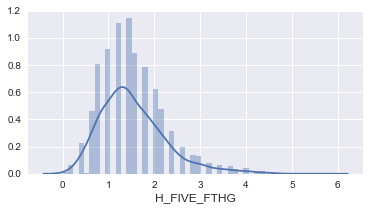

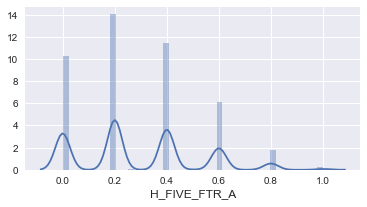

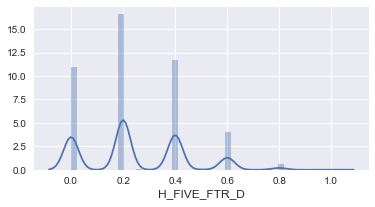

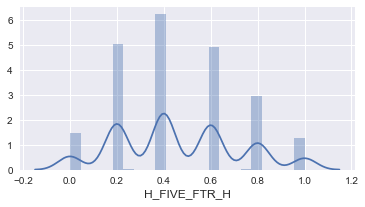

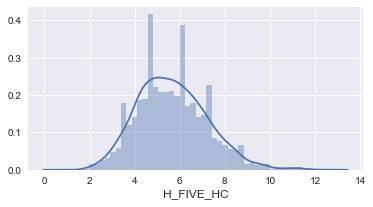

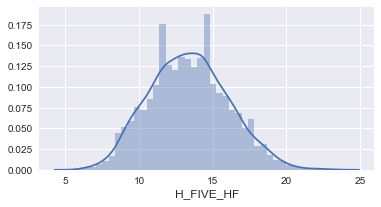

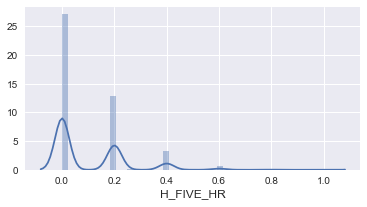

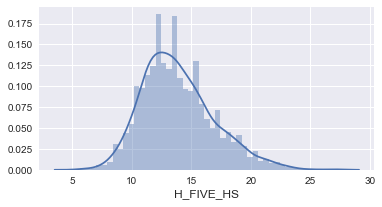

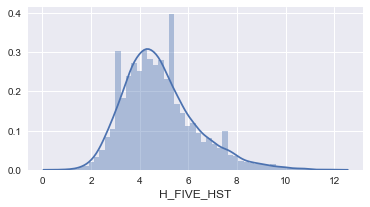

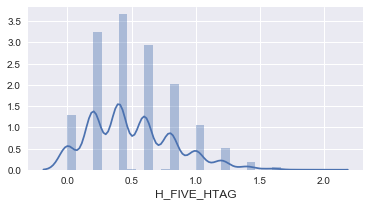

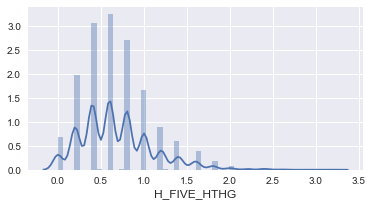

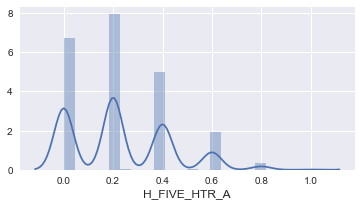

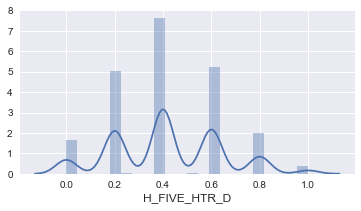

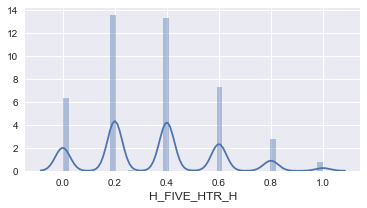

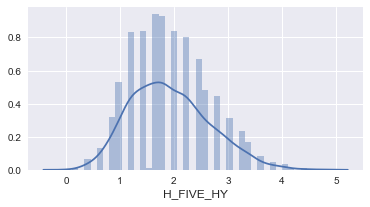

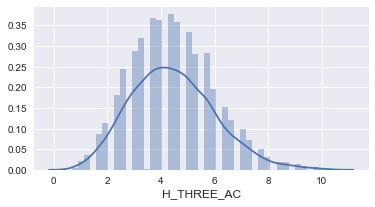

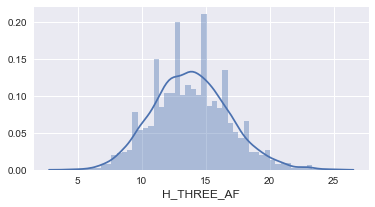

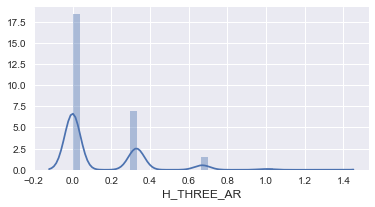

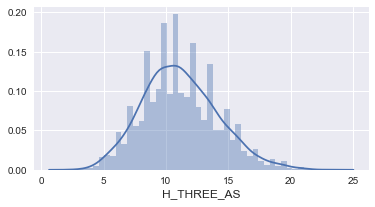

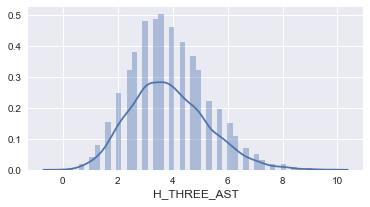

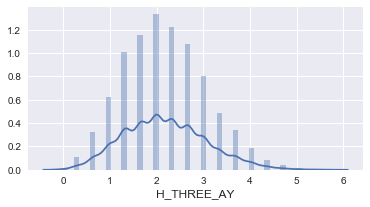

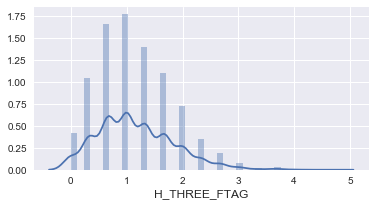

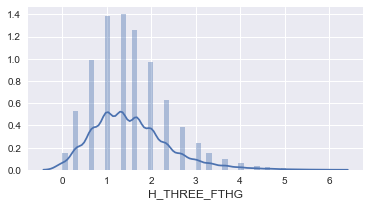

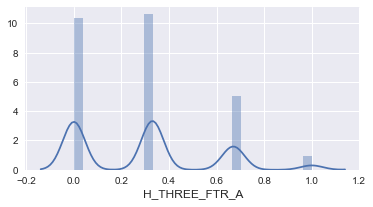

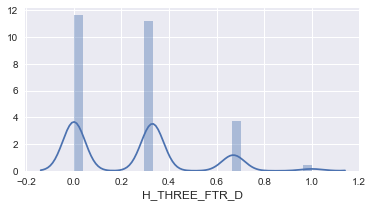

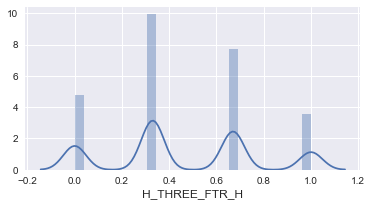

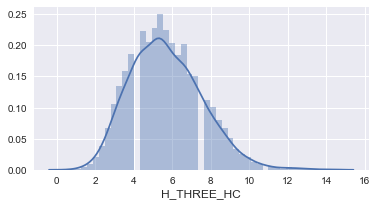

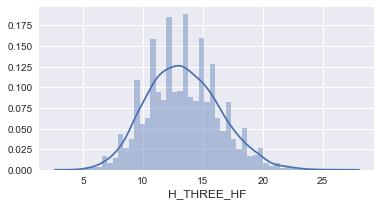

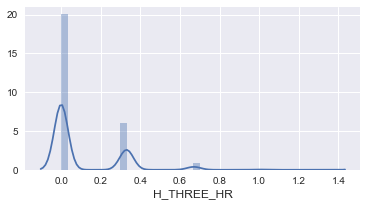

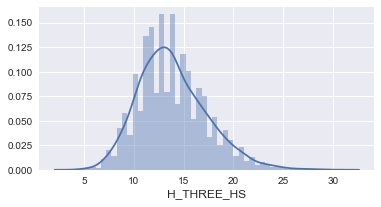

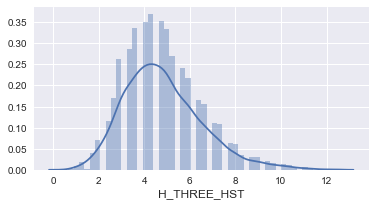

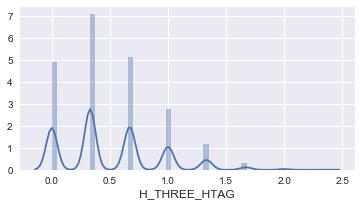

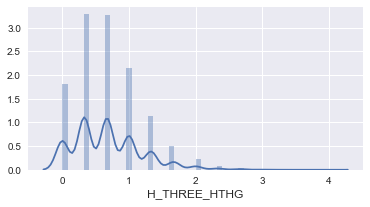

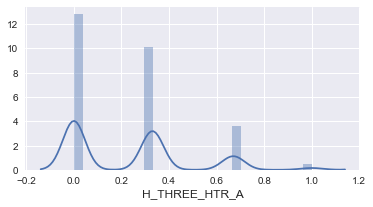

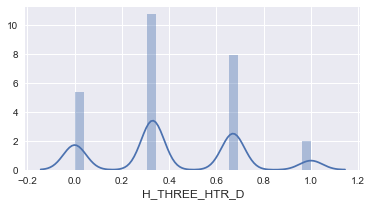

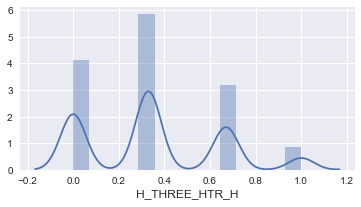

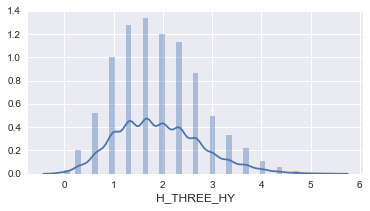

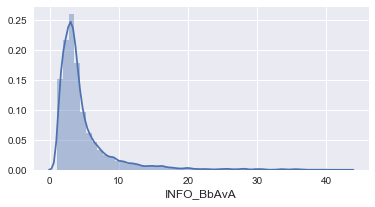

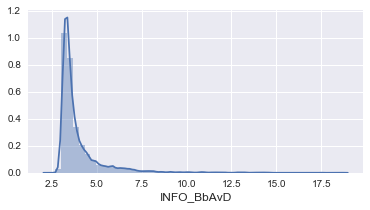

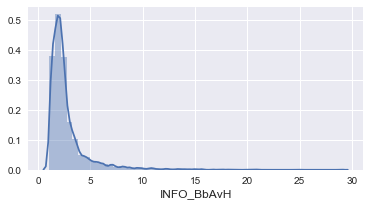

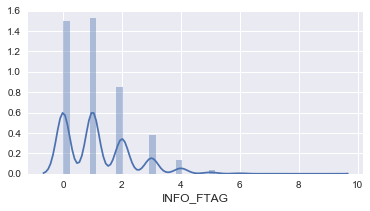

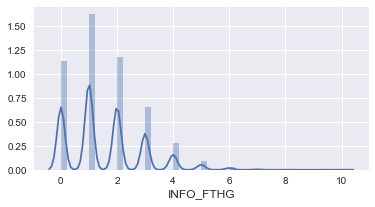

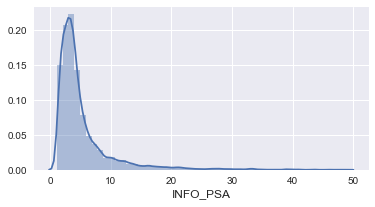

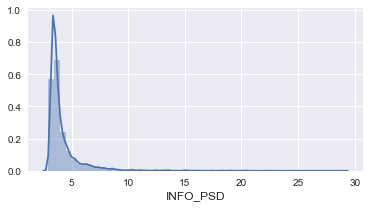

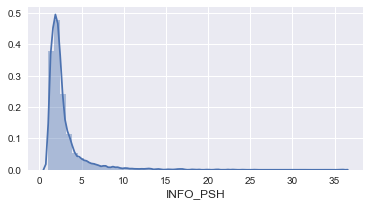

In [12]:
def draw_distribution_histograms(df, col_name):
    plt.figure(figsize=(6,3))
    sns.distplot(df[col_name].dropna().values)
    plt.xlabel(col_name, fontsize=12)
    plt.show()

for row in df.select_dtypes(include=['float64']).columns:
    draw_distribution_histograms(df, row)